## LGD ##
<hr class="header-line"/>

+ at the time of default, LGD is a simple calculation:

$$ \text{Principal Owed} - \text{Asset Value} - \text{Recovery Costs} $$

+ predicting LGD is very difficult with current models tending to be very complex

And so, recovery costs and asset value are key considerations when trying to both predict losses and actually operate a fico.

<p class="p-break"></p>

### Recovery Costs ###

+ can be projected fairly easily, in particular if a 3rd party is contracted for repossession and/or storage and/or sale
+ if repo companies contracted for sale, they generally get below market value as usually dispose through auction or otherwise
+ *could* be a recovery *benefit* if Opco takes product back into inventory and sells it at market value (and market value is more than the princpal owed)
+ agreement between Opco / Fico could govern terms at which Opco would take back into inventory, e.g. at what price would Opco buy it back

### Asset Value ###

The value of an asset has several features that add uncertainty LGD.

<p class="p-break"></p>

**Changes over Time**

+ Generally, the value of an asset decays exponentially. The principal on a loan almost always "decays", or is repaid, straight-line.
+ I think most people understand this about new vehicles. If a person gets 100% financing on a new car, I think its generally understood that the car is worth less than the amount owed the moment it is driven of the car lot.
+ this is commonly thought of as a risk to the buyer/borrower. If forced to sell the vehicle and settle the loan, they would have to pay out of pocket for some portion.
+ BUT *this is also a risk to seller/lender*, who would also be "out of pocket" whatever amount the resale value is less than the amount owed (this is the loss given default).
    
    

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.core.display import display, HTML, Markdown

import sys
sys.path.append('..')
from htsfi.main import *

update_style()
plt.style.use('htsfi')

NameError: name 'update_style' is not defined

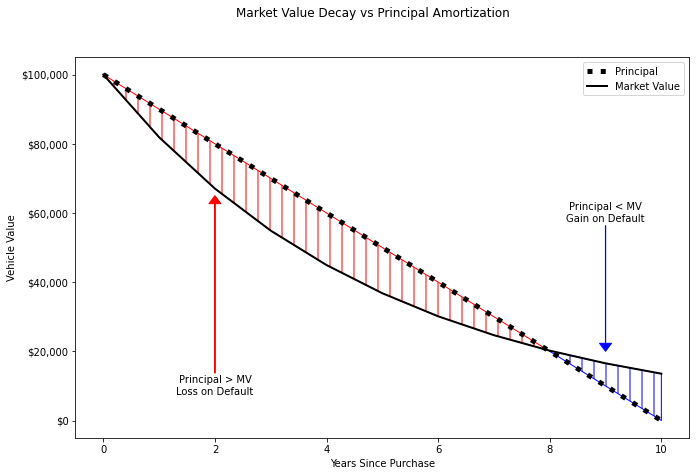

In [2]:
import numpy as np
from scipy.stats import bernoulli as bern, beta, gamma, norm, expon

fig, ax = plt.subplots(figsize=(11,7))

loan = 100000
x = np.arange(11)
owed = np.linspace(loan, 0, 11)
ax.plot(x, owed, 'black', ls='dotted', lw=5, label='Principal')

mv = expon.pdf(x, 0, 5)*loan*5
ax.plot(x, mv, 'black', lw=2, label='Market Value')

plt.fill_between(x, owed, mv, where=x<8.5, facecolor='none', hatch='|', edgecolor='r')
plt.fill_between(x, owed, mv, where=x>7, facecolor='none', hatch='|', edgecolor='b')

plt.annotate(
    'Principal > MV\nLoss on Default', (2, 65000), 
    xytext=(2, 10000), 
    ha='center', va='center',
    arrowprops={'width': .25, 'headlength': 8, 'color': 'r'}
)
plt.annotate(
    'Principal < MV\nGain on Default', (9, 20000), 
    xytext=(9, 60000), 
    ha='center', va='center',
    arrowprops={'width': .25, 'headlength': 8, 'color': 'b'}
)
import matplotlib.ticker as ticker
@ticker.FuncFormatter
def major_formatter(x, pos):
    return f'${x:,.0f}'

ax.yaxis.set_major_formatter(major_formatter)

ax.set_ylabel('Vehicle Value')
ax.set_xlabel('Years Since Purchase')

ax.legend()
plt.suptitle('Market Value Decay vs Principal Amortization')
plt.show()

+  Beyond that, we all understand in the car market that not all assets depreciate at the same rate. Luxury cars are understood to hold their value better, for example.

<img src="_static/Car_Depreciation_for_several_models.png" width="800" alt="Image Not Loaded"></img>

+ Lease v Loan
    + leases and loans have different features that result in very different LGDs
    + Leasing has lower recovery costs 
    + Leasing may be higher risk B/C you MUST take the asset back.
        + Results in storage costs, resale market risk
        + Can avoid with 0% residual at maturity.
    + Leasing has potential for >100% recovery.
    + Beta distribution typically used for LGD but for lease assets, [non-parametric estimates are likely more accurate](https://core.ac.uk/download/pdf/33335625.pdf). 

+ Fico Processes for Evaluating LGD ongoing would include

    + internal: value equipment based on expert opinions of Opco
    + external: value based on external sources like [auctions](https://www.bid-on-equipment.com/hvac-equipment), [brokers](https://www.lazcocorp.com/), or appraisers.
    + over time, collect internal data on historical outcomes and compare with expectations
    + external model: there are likely datasets and models available from 3rd parties